# Dockless Scooter Data

In [195]:
import matplotlib, shapely, geopandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
scooter_data = pd.read_csv('~/work/data/Dockless_Vehicle_Trips.csv')
austin_data = austin = geopandas.GeoDataFrame.from_file('/home/jovyan/work/data/census_tracts_2010_msa/census_tracts_2010_msa.shp',)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dropping the first 6 digits of the tract start and end ids and converting to a numerical type.

In [3]:
scooter_data = scooter_data.dropna(subset=['Census Tract Start'])
                                   
scooter_data.head()

,ID,Device ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,Council District (Start),Council District (End),Year,Census Tract Start,Census Tract End
2,aa27d854-9f27-456e-ae49-f268a9b2b533,6b90a827-60a1-47ad-94a4-d33654dbd50d,scooter,170.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
3,b7c9f133-966b-46f1-91ce-2682ce7fcf50,1e5234a3-e86b-41e1-a1ad-e98310f3a71c,scooter,90.0,0.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
4,1d4f5d89-c044-46cb-8674-80d37fa0371f,caa0325c-7c0b-4909-a573-d83126ecc953,scooter,570.0,826.0,04/29/2019 05:15:00 PM,04/29/2019 05:15:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
5,cd442fb9-058f-46a7-af90-b4adb56fd163,1653cf10-75f5-4934-a9d9-c8d43ade67a9,scooter,438.0,1815.0,04/29/2019 05:30:00 PM,04/29/2019 05:45:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10
6,e1ac0e42-ab2d-4eac-b019-f085169c1d38,1d89f9e2-d01a-4736-b7d8-258cb9a2108c,scooter,391.0,1519.0,04/29/2019 05:30:00 PM,04/29/2019 05:30:00 PM,04/30/2019 06:45:17 AM,4.0,17.0,1.0,9.0,9.0,2019.0,4.8453e+10,4.8453e+10


In [18]:
scooter_data = scooter_data[scooter_data['Census Tract Start'] != 'OUT_OF_BOUNDS']
scooter_data = scooter_data[scooter_data['Census Tract End'] != 'OUT_OF_BOUNDS']
scooter_data['Census Tract Start'] = pd.to_numeric(scooter_data['Census Tract Start'])
scooter_data['Census Tract End'] = pd.to_numeric(scooter_data['Census Tract End'])

/opt/conda/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [19]:
def tract_to_trunk(tract):
    return "%06d" % (int(tract) % 1000000)

scooter_data['tract_start'] = scooter_data['Census Tract Start'].apply(tract_to_trunk)
scooter_data['tract_end'] = scooter_data['Census Tract End'].apply(tract_to_trunk)

In [178]:
oncampus  = ['000601']
offcampus = ['000204', '000500', '000700', '000401', '000604', '000603']
scooter_data_starting = scooter_data[scooter_data['tract_start'].isin(oncampus + offcampus)]
scooter_data_ending   = scooter_data[scooter_data['tract_end'].isin(oncampus + offcampus)]

In [10]:
scooter_data_raw = pd.read_csv('~/work/data/Dockless_Vehicle_Trips.csv')
scooter_data_raw.shape

(4561813, 16)

In [22]:
100 * (scooter_data_starting.shape[0] / scooter_data_raw.shape[0])

31.847052915145795

In [84]:
start_freqs = scooter_data_starting.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
start_data = geopandas.GeoDataFrame(pd.merge(start_freqs, austin_data, how='inner', left_on=['tract_start'], right_on=['TRACTCE10']))
start_data.head()

,tract_start,count,TRACTCE10,SUM_totpop,SUM_white,SUM_black,SUM_hispan,SUM_asian,SUM_other,SUM_multi,...,SUM_AGE651,SUM_AGE_65,SUM_AGE75_,SUM_AGE80_,SUM_AGE_85,SUM_FAMSWC,SUM_POP_IN,SUM_FAMILI,SUM_NONFAM,geometry
0,000204,24339,000204,3009.0,2396.0,43.0,323.0,161.0,8.0,78.0,...,21.0,80.0,27.0,20.0,26.0,234.0,56.0,495.0,1101.0,"POLYGON ((3114760.420262146 10081981.02697965,..."
1,000401,111638,000401,3574.0,2446.0,128.0,445.0,439.0,14.0,102.0,...,26.0,86.0,24.0,19.0,19.0,159.0,195.0,442.0,1288.0,"POLYGON ((3119875.384202184 10081103.12966995,..."
2,000500,43637,000500,4518.0,3305.0,67.0,545.0,464.0,18.0,119.0,...,37.0,101.0,13.0,11.0,15.0,147.0,77.0,430.0,2110.0,"POLYGON ((3117812.349419988 10078757.10780583,..."
3,000601,506146,000601,9207.0,4491.0,494.0,1972.0,1943.0,12.0,295.0,...,1.0,2.0,0.0,0.0,0.0,11.0,8396.0,44.0,389.0,"POLYGON ((3116530.436981633 10075208.93904213,..."
4,000603,342530,000603,7793.0,5121.0,149.0,972.0,1351.0,22.0,178.0,...,5.0,14.0,2.0,0.0,1.0,17.0,821.0,209.0,3027.0,"POLYGON ((3114630.355919199 10079462.03781622,..."


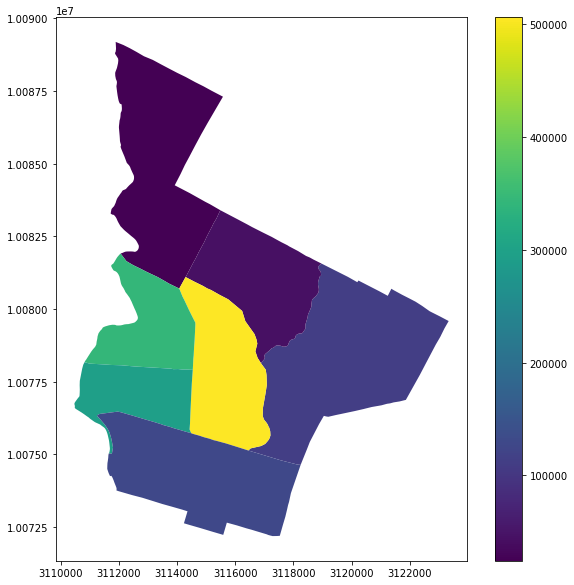

In [87]:
fig, ax = plt.subplots(figsize=(10,10))
start_data.plot(column='count', ax=ax, legend=True)

In [88]:
end_freqs = scooter_data_ending.groupby(['tract_end'])['tract_end'].agg('count').to_frame('count').reset_index()
end_data = geopandas.GeoDataFrame(pd.merge(end_freqs, austin_data, how='inner', left_on=['tract_end'], right_on=['TRACTCE10']))
end_data.head()

,tract_end,count,TRACTCE10,SUM_totpop,SUM_white,SUM_black,SUM_hispan,SUM_asian,SUM_other,SUM_multi,...,SUM_AGE651,SUM_AGE_65,SUM_AGE75_,SUM_AGE80_,SUM_AGE_85,SUM_FAMSWC,SUM_POP_IN,SUM_FAMILI,SUM_NONFAM,geometry
0,000204,21447,000204,3009.0,2396.0,43.0,323.0,161.0,8.0,78.0,...,21.0,80.0,27.0,20.0,26.0,234.0,56.0,495.0,1101.0,"POLYGON ((3114760.420262146 10081981.02697965,..."
1,000401,108010,000401,3574.0,2446.0,128.0,445.0,439.0,14.0,102.0,...,26.0,86.0,24.0,19.0,19.0,159.0,195.0,442.0,1288.0,"POLYGON ((3119875.384202184 10081103.12966995,..."
2,000500,41211,000500,4518.0,3305.0,67.0,545.0,464.0,18.0,119.0,...,37.0,101.0,13.0,11.0,15.0,147.0,77.0,430.0,2110.0,"POLYGON ((3117812.349419988 10078757.10780583,..."
3,000601,527429,000601,9207.0,4491.0,494.0,1972.0,1943.0,12.0,295.0,...,1.0,2.0,0.0,0.0,0.0,11.0,8396.0,44.0,389.0,"POLYGON ((3116530.436981633 10075208.93904213,..."
4,000603,296554,000603,7793.0,5121.0,149.0,972.0,1351.0,22.0,178.0,...,5.0,14.0,2.0,0.0,1.0,17.0,821.0,209.0,3027.0,"POLYGON ((3114630.355919199 10079462.03781622,..."


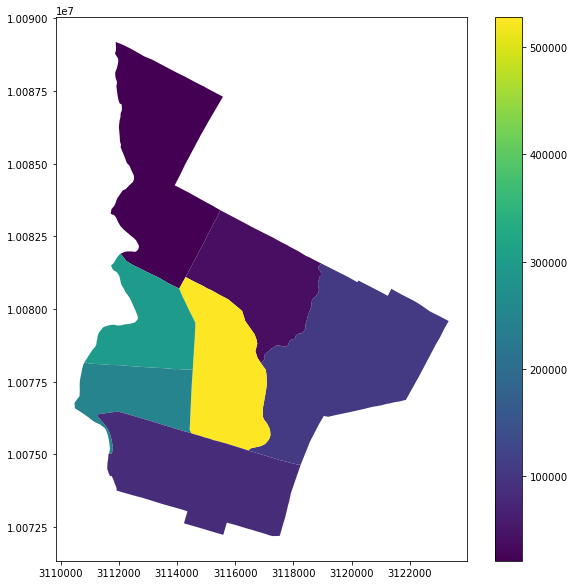

In [89]:
fig, ax = plt.subplots(figsize=(10,10))
end_data.plot(column='count', ax=ax, legend=True)

In [104]:
print(scooter_data_starting.shape, scooter_data_ending.shape)
scooter_data_starting.head()
merged_data =scooter_data_starting[scooter_data_starting['ID'].isin(scooter_data_ending['ID'])]
merged_data.shape

(1452803, 18) (1327537, 18)


(1327537, 18)

In [107]:
merged_start_freqs = merged_data.groupby(['tract_start'])['tract_start'].agg('count').to_frame('count').reset_index()
merged_end_freqs = merged_data.groupby(['tract_end'])['tract_end'].agg('count').to_frame('count').reset_index()

merged_start_data = geopandas.GeoDataFrame(pd.merge(merged_start_freqs, austin_data, how='inner', left_on=['tract_start'], right_on=['TRACTCE10']))
merged_end_data = geopandas.GeoDataFrame(pd.merge(merged_end_freqs, austin_data, how='inner', left_on=['tract_end'], right_on=['TRACTCE10']))

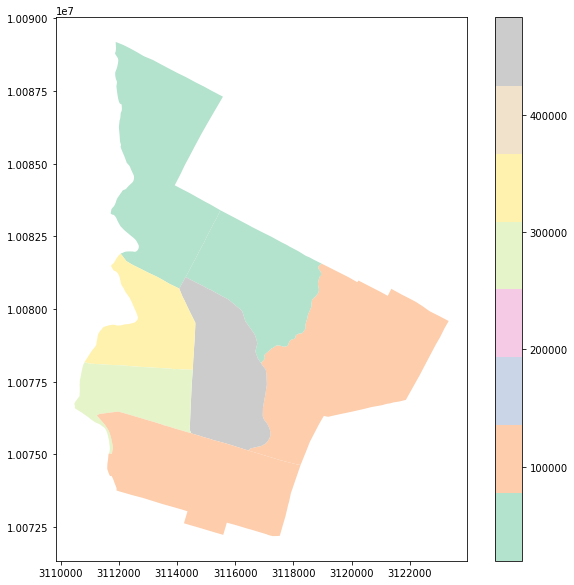

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
merged_start_data.plot(column='count', ax=ax, legend=True, cmap='Pastel2')

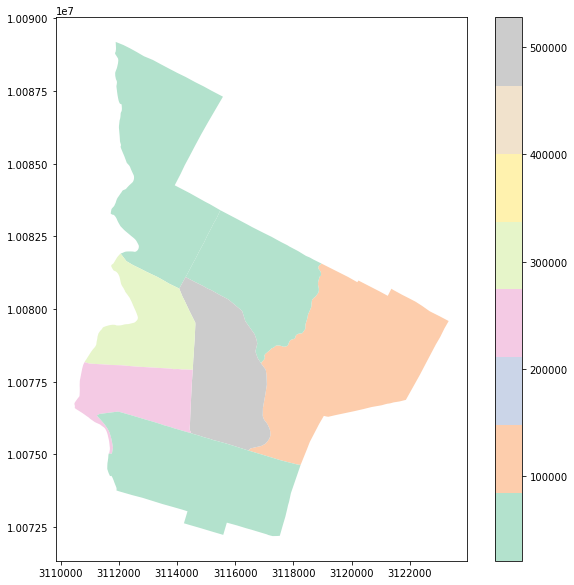

In [111]:
fig, ax = plt.subplots(figsize=(10,10))
merged_end_data.plot(column='count', ax=ax, legend=True, cmap='Pastel2')

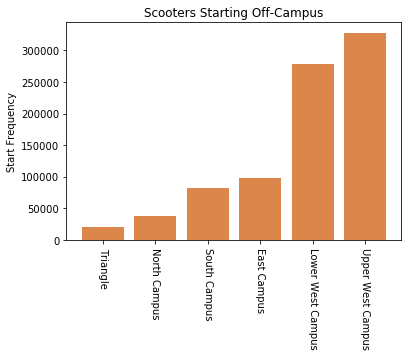

In [197]:
total = 0
d = []
d_norm = []
labels = []
for loc in offcampus:
    freq = merged_start_freqs[merged_start_freqs["tract_start"] == loc]["count"].iloc[0]
    total += freq
    labels.append(tract_to_name[str(loc)])
    d.append(freq)

for loc in offcampus:
    freq = merged_start_freqs[merged_start_freqs["tract_start"] == loc]["count"].iloc[0]
    d_norm.append(freq / total)

plt.bar(labels, d, align='center', color='#cc5500', alpha=0.7)
plt.ylabel('Start Frequency')
plt.xticks(rotation=-90)
plt.title('Scooters Starting Off-Campus')

plt.show()

In [221]:
tract_to_name = {
    '000204': "Triangle",
    '000500': "North Campus",
    '000700': "South Campus",
    '000401': "East Campus",
    '000604': "Lower West Campus",
    '000603': "Upper West Campus",
    '000601': "Campus"
}

tract_to_index = {
    '000204': 0,
    '000500': 1,
    '000700': 2,
    '000401': 3,
    '000604': 4,
    '000603': 5,
    '000601': 6,
}

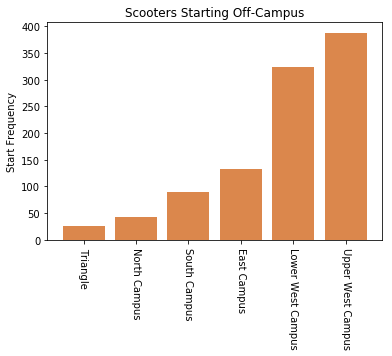

In [227]:
# randomly sample a location :-)
freqqq = [0]*len(offcampus)
for _ in range(1000):
    freqqq[tract_to_index[np.random.choice(offcampus, p=d_norm)]] += 1

plt.bar(labels, freqqq, align='center', color='#cc5500', alpha=0.7)
plt.ylabel('Start Frequency')
plt.xticks(rotation=-90)
plt.title('Scooters Starting Off-Campus')

plt.show()